In [1]:
import pandas as pd
df1 = pd.read_csv("C:/Users/oyj57/Downloads/archive/상파울루2015.csv")
df2 = pd.read_csv("C:/Users/oyj57/Downloads/archive/상파울루2017.csv")
df3 = pd.read_csv("C:/Users/oyj57/Downloads/archive/상파울루2020.csv")

# 데이터프레임 합치기 (세로로 합치기)
df = pd.concat([df1, df2, df3], axis=0)

# 합친 데이터프레임을 새로운 CSV 파일로 저장
#combined_df.to_csv('상파울루2015-2022.csv', index=False)

In [2]:
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Sao Paulo,Brazil",2015-01-01,31.4,23.4,26.8,31.7,23.4,27.0,17.6,58.2,...,18.1,7,NaN,2015-01-01T06:23:23,2015-01-01T19:56:45,0.37,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"SBMT,83779099999,83075099999,SBKP,SBSP,8372109..."
1,"Sao Paulo,Brazil",2015-01-02,32.6,23.5,26.9,33.1,23.5,27.1,18.2,60.4,...,15.4,6,NaN,2015-01-02T06:24:02,2015-01-02T19:57:01,0.41,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"SBMT,83779099999,83075099999,SBKP,SBSP,8372109..."
2,"Sao Paulo,Brazil",2015-01-03,28.2,22.0,23.9,30.4,22.0,24.2,20.0,79.3,...,12.5,5,NaN,2015-01-03T06:24:42,2015-01-03T19:57:17,0.44,Overcast,Cloudy skies throughout the day.,cloudy,"SBMT,83779099999,83075099999,SBKP,SBSP,8372109..."
3,"Sao Paulo,Brazil",2015-01-04,27.6,21.5,23.3,28.3,21.5,23.4,18.3,73.9,...,15.0,6,NaN,2015-01-04T06:25:22,2015-01-04T19:57:31,0.48,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"SBMT,83779099999,83075099999,SBKP,SBSP,8372109..."
4,"Sao Paulo,Brazil",2015-01-05,27.5,21.0,22.8,28.3,21.0,22.9,18.6,77.9,...,18.3,8,NaN,2015-01-05T06:26:03,2015-01-05T19:57:44,0.50,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"SBMT,83779099999,83075099999,SBKP,SBSP,8372109..."


In [3]:
df['datetime'] = pd.to_datetime(df['datetime'])

# 'year' 열을 추가하여 연도 추출
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month


# 습도 점수 계산 함수
def calculate_humidity_score(humidity):
    if 60 <= humidity < 75:
        return 20
    elif 75 <= humidity < 85 or 55 <= humidity < 60:
        return 14
    else:
        return 0
df['humidity_score'] = df['humidity'].apply(calculate_humidity_score)


# 연도별 평균 습도 계산
yearly_avg_scores = df.groupby('year')['humidity_score'].mean().reset_index()

In [4]:
yearly_avg_scores

,year,humidity_score
0,2015,15.336986
1,2016,15.677596
2,2017,15.084932
3,2018,15.556164
4,2019,14.931507
5,2020,14.781421
6,2021,14.498630
7,2022,12.460274


In [66]:
def calculate_tem_score(humidity):
    if 15 <= humidity <= 24:
        return 1
    else:
        return 0
df['temp_score'] = df['temp'].apply(calculate_tem_score)

# 연도별 평균 습도 계산
yearly_avg_scores = df.groupby('year')['temp_score'].mean().reset_index()
yearly_avg_scores['advanced temp_score'] = yearly_avg_scores['temp_score'] * 30


In [67]:
yearly_avg_scores

,year,temp_score,advanced temp_score
0,2015,0.816438,24.493151
1,2016,0.693989,20.819672
2,2017,0.808219,24.246575
3,2018,0.830137,24.904110
4,2019,0.739726,22.191781
5,2020,0.811475,24.344262
6,2021,0.835616,25.068493
7,2022,0.805479,24.164384


In [68]:
# windspped 점수 계산 함수
def calculate_wind_score(windspeed):
    if 0 <= windspeed <= 40:
        return 10
        return 0  #  범위를 벗어나는 경우

df['wind_score'] = df['windspeed'].apply(calculate_wind_score)

# 연도별 풍속점수계산
yearly_avg_scores = df.groupby('year')['wind_score'].mean().reset_index()


In [69]:
yearly_avg_scores 

,year,wind_score
0,2015,10.0
1,2016,10.0
2,2017,10.0
3,2018,10.0
4,2019,10.0
5,2020,10.0
6,2021,10.0
7,2022,10.0


In [4]:
daylight_duration = []
df['sunrise'] = pd.to_datetime(df['sunrise'])
df['sunset'] = pd.to_datetime(df['sunset'])

# 일조시간 계산
df['daylight_duration'] = (df['sunset'] - df['sunrise']).dt.total_seconds() / 3600  # 시간 단위로 변환



In [5]:
df['daylight_duration']

0      13.556111
1      13.549722
2      13.543056
3      13.535833
4      13.528056
         ...    
970    13.578611
971    13.575278
972    13.571111
973    13.566667
974    13.561389
Name: daylight_duration, Length: 2922, dtype: float64

In [15]:
yearly_daylight_duration = df.groupby('year')['daylight_duration'].sum().reset_index()

In [16]:
yearly_daylight_duration

,year,daylight_duration
0,2015,4417.782778
1,2016,4431.340278
2,2017,4417.786389
3,2018,4417.784444
4,2019,4417.785833
5,2020,4431.345278
6,2021,4417.789722
7,2022,4417.791111


In [17]:
#강수량 
#1150-1600적정강수량:30 ,1600~1650,1100~1150~: 25점,1650~1750: 20,1000~1100:15,1800~2000, 800~1000:10, 800이하 0,

In [6]:
df1 = pd.read_excel("C:/Users/oyj57/Downloads/archive/브라질원두생산량.xlsx") 

In [7]:
brazil = df1[df1['location'] == 'Brazil']
yearly_coffee= brazil.groupby('year')['생산량(톤)'].sum().reset_index()

In [8]:
yearly_coffee 

,year,생산량(톤)
0,2006,10356158
1,2007,26275404
2,2008,32795661
3,2009,28837821
4,2010,33388910
5,2011,31633728
6,2012,36377589
7,2013,34750774
8,2014,33248891
9,2015,31233631


In [9]:
brazil = df1[df1['location'] == 'São Paulo']
brazil2 = brazil[brazil['year'] == 2020]

In [22]:
brazil2

,month,year,location,재배면적(헥타르),수확면적(헥타르),생산량(톤),평균 수확량(헥타르당 킬로그램)
642,1,2020,São Paulo,215729,202027,282810,2683
646,2,2020,São Paulo,215729,202027,282810,2683
650,3,2020,São Paulo,215729,202027,282810,2683
654,4,2020,São Paulo,215729,202027,282810,2683
658,5,2020,São Paulo,215729,202027,282810,2683
662,6,2020,São Paulo,213775,201477,349504,3607
666,7,2020,São Paulo,213775,201477,349504,3607
670,8,2020,São Paulo,213775,201477,349504,3607
674,9,2020,São Paulo,211038,198747,370088,3734
678,10,2020,São Paulo,211038,198747,370088,3734


In [15]:
yearly_sancoffee= brazil.groupby('year')['생산량(톤)'].sum().reset_index()
yearly_sancoffee

,year,생산량(톤)
0,2006,1039280
1,2007,1968444
2,2008,2980543
3,2009,2327040
4,2010,2856552
5,2011,2480036
6,2012,3417401
7,2013,2948811
8,2014,2643959
9,2015,2423292


In [24]:
brazil

,month,year,location,재배면적(헥타르),수확면적(헥타르),생산량(톤),평균 수확량(헥타르당 킬로그램)
2,9,2006,São Paulo,236013,220186,259820,1180
6,10,2006,São Paulo,236013,220186,259820,1180
10,11,2006,São Paulo,236013,220186,259820,1180
14,12,2006,São Paulo,236013,220186,259820,1180
18,1,2007,São Paulo,236010,220186,187158,850
...,...,...,...,...,...,...,...
798,4,2023,São Paulo,190948,188780,285021,3023
802,5,2023,São Paulo,190948,188780,285021,3023
806,6,2023,São Paulo,190948,188780,285021,3023
810,7,2023,São Paulo,190948,188780,285021,3023


In [37]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 기후 데이터와 생산량 데이터를 병합
merged_data = pd.merge(df, brazil, on=['year', 'month'], how='inner')

# 특성 엔지니어링: 필요한 특성 선택 또는 추가
features = ['temp', 'precip', 'humidity', 'daylight_duration', 'windspeed']
X = merged_data[features]
y = merged_data['생산량(톤)']

# 훈련 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 초기화
model = xgb.XGBRegressor()

# 모델 학습
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# 모델 성능 평가 (예시: 평균 제곱 오차)
mse = mean_squared_error(y_test, y_pred)
print(f"평균 제곱 오차 (MSE): {mse}") #망..


평균 제곱 오차 (MSE): 3136057218.4993014


C:\Users\oyj57\AppData\Local\Temp\ipykernel_1956\760714550.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brazil['date'] = pd.to_datetime(brazil['year'].astype(str) + '-' + brazil['month'].astype(str), format='%Y-%m')
C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

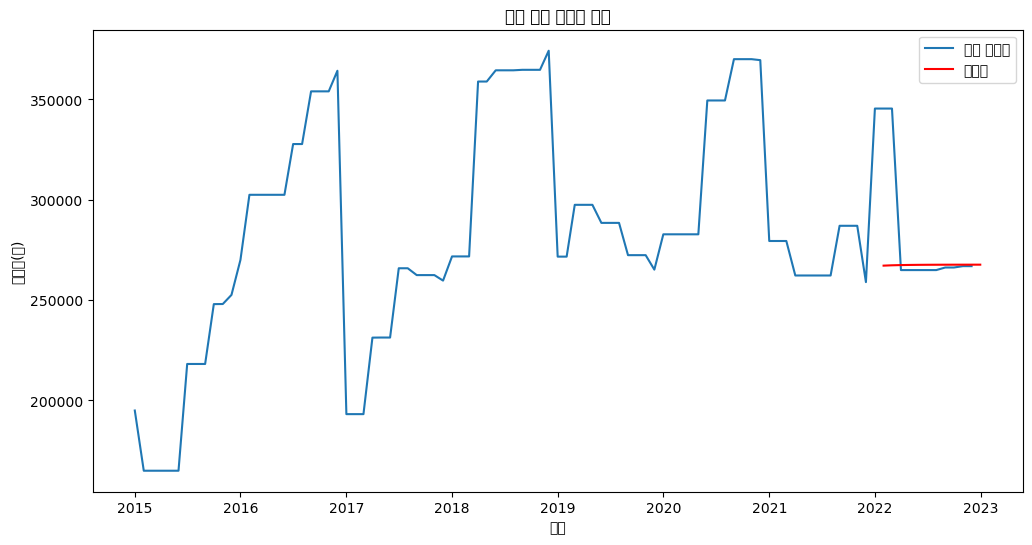

평균 제곱 오차 (MSE): 1529462134.7670906


In [39]:
df['date'] = pd.to_datetime(df['datetime'])
df.set_index('date', inplace=True)
brazil['date'] = pd.to_datetime(brazil['year'].astype(str) + '-' + brazil['month'].astype(str), format='%Y-%m')
brazil.set_index('date', inplace=True)

# 기후 데이터와 커피 원두 생산량 데이터 병합
merged_data = pd.merge(brazil, df, how='inner', left_index=True, right_index=True)
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# ARIMA 모델 학습
model = ARIMA(merged_data['생산량(톤)'], order=(1, 1, 1))
model_fit = model.fit()

# 예측 시작 및 끝 날짜 설정
start_date = '2022-01-01'
end_date = '2022-12-31'

# 예측 수행
forecast = model_fit.forecast(steps=len(merged_data[start_date:end_date]))

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(merged_data['생산량(톤)'], label='실제 데이터')
plt.plot(pd.date_range(start_date, end_date, freq='M'), forecast, label='예측값', color='red')
plt.title('커피 원두 생산량 예측')
plt.xlabel('날짜')
plt.ylabel('생산량(톤)')
plt.legend()
plt.show()

# 모델 성능 평가 (예시: 평균 제곱 오차)
mse = mean_squared_error(merged_data[start_date:end_date]['생산량(톤)'], forecast)
print(f"평균 제곱 오차 (MSE): {mse}")


In [106]:
cf = pd.read_excel("C:/Users/oyj57/Downloads/archive/커피재배지수original.xlsx") 
af = pd.read_excel("C:/Users/oyj57/Downloads/archive/커피지수(before).xlsx") 


In [114]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 데이터 준비 및 전처리 (cf 데이터프레임에서 필요한 컬럼 선택 및 전처리)
cf_selected = cf[['커피재배지수', 'year']]

# "brazil" 데이터프레임에서 커피 생산량 데이터 선택 (타겟 데이터)
y = cf['상파울루 커피생산량']


# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 학습
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"평균 제곱 오차 (MSE): {mse}")

# 새로운 데이터에 대한 예측 수행
new_data = pd.DataFrame({'커피재배지수': cf_selected['커피재배지수'], 'year': cf_selected['year']})
predictions = model.predict(new_data)


평균 제곱 오차 (MSE): 361507476618.15625


평균 제곱근 오차 (RMSE): 601254.9181654619


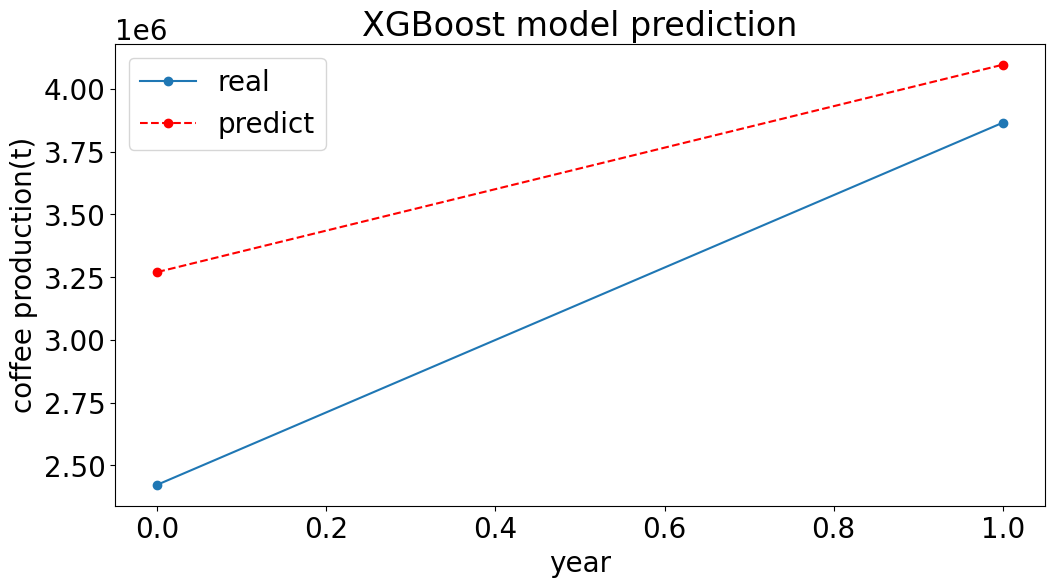

In [113]:
import numpy as np
rmse = np.sqrt(mse)
print(f"평균 제곱근 오차 (RMSE): {rmse}")

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='real', marker='o')
plt.plot(y_test.index, y_pred, label='predict', color='red', linestyle='dashed', marker='o')
plt.legend()
plt.xlabel('year')
plt.ylabel('coffee production(t)')
plt.title('XGBoost model prediction')
plt.show()

평균 제곱 오차 (RMSE): 620596.6934140883


C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53668 (\N{HANGUL SYLLABLE TON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52964 (\N{HANGUL SYLLABLE KEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph

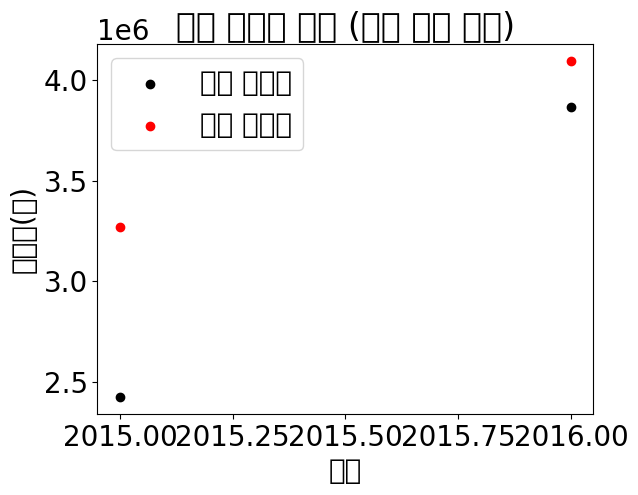

In [112]:
#의사결정나무
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# cf 데이터프레임에서 커피재배지수와 연도 정보만 선택
X =cf[['커피재배지수', 'year']]

# brazil 데이터프레임에서 'production_tonnes' 컬럼만 선택
y = cf['상파울루 커피생산량']

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 의사 결정 트리 모델 생성
model = DecisionTreeRegressor()

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터로 예측 수행
y_pred = model.predict(X_test)

# 모델 평가 (RMSE 계산)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'평균 제곱 오차 (RMSE): {rmse}')

# 예측 결과 시각화
plt.scatter(X_test['year'], y_test, color='black', label='실제 생산량')
plt.scatter(X_test['year'], y_pred, color='red', label='예측 생산량')
plt.xlabel('연도')
plt.ylabel('생산량(톤)')
plt.title('커피 생산량 예측 (의사 결정 트리)')
plt.legend()
plt.show()


In [111]:
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# K-Fold 교차 검증을 통한 성능 평가 (5-Fold 사용 예)
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# MSE를 RMSE로 변환
rmse_scores = [(-score) ** 0.5 for score in scores]

# 교차 검증 평균 RMSE 계산
avg_rmse = sum(rmse_scores) / len(rmse_scores)
print(f'평균 제곱 오차 (RMSE) 평균: {avg_rmse}')

평균 제곱 오차 (RMSE) 평균: 251342.99742245628


평균 제곱 오차 (RMSE): 574220.596195442


ValueError: x and y must be the same size

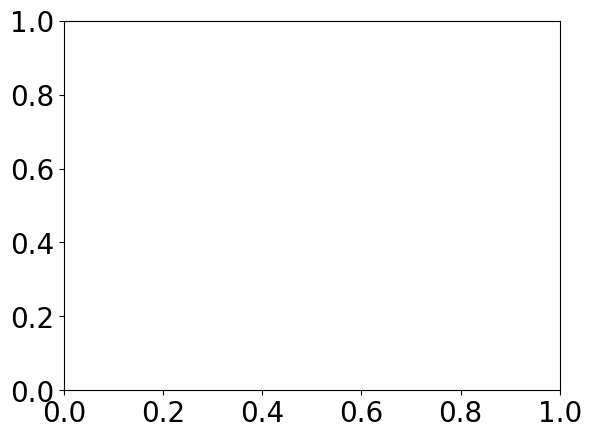

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# cf 데이터프레임에서 커피재배지수와 연도 정보만 선택
X = cf[['커피재배지수', 'year']]

# brazil 데이터프레임에서 'production_tonnes' 컬럼만 선택
y =cf['상파울루 커피생산량']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
rf_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = rf_model.predict(X_test)

# 성능 평가 (평균 제곱 오차 RMSE 계산)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'평균 제곱 오차 (RMSE): {rmse}')

# 예측 결과 시각화 (선택 사항)
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='blue', label='실제값')
plt.scatter(X_test, y_pred, color='red', label='예측값')
plt.xlabel('커피재배지수')
plt.ylabel('커피생산량(톤)')
plt.legend()
plt.show()

In [107]:

cf=cf.dropna()
cf

,year,humidity20,기온30,강수량30,풍속10,일조시간10,가산점,커피재배지수,연강수량,브라질 커피 생산량,상파울루 커피생산량
0,2015,15.34,24.49,20,10,10,-3,61.49,1896.8,31233631,2423292
1,2016,15.68,20.82,30,10,10,0,70.82,1569.8,35559852,3864584
2,2017,15.08,24.25,25,10,10,-3,66.25,1674.0,33274283,2852636
3,2018,15.57,24.90,30,10,10,0,74.90,1178.1,40737037,4095507
4,2019,14.93,22.19,25,10,10,-3,64.19,1774.5,37454328,3383872
5,2020,14.78,24.34,25,10,10,0,69.34,1745.5,42467685,3942424
6,2021,14.50,25.07,20,10,10,-3,62.07,1090.6,34581146,3270024


In [76]:
af = af.dropna()
af

,year,humidity20,기온30,강수량30,풍속10,일조시간10,커피재배지수,연강수량,브라질 커피 생산량,상파울루 커피생산량
0,2015,15.34,24.49,20.0,10.0,10.0,64.49,1896.8,31233631.0,2423292.0
1,2016,15.68,20.82,30.0,10.0,10.0,70.82,1569.8,35559852.0,3864584.0
2,2017,15.08,24.25,25.0,10.0,10.0,69.25,1674.0,33274283.0,2852636.0
3,2018,15.57,24.90,30.0,10.0,10.0,74.90,1178.1,40737037.0,4095507.0
4,2019,14.93,22.19,20.0,10.0,10.0,62.19,1774.5,37454328.0,3383872.0
5,2020,14.78,24.34,25.0,10.0,10.0,69.34,1745.5,42467685.0,3942424.0
6,2021,14.50,25.07,20.0,10.0,10.0,65.07,1090.6,34581146.0,3270024.0


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 08, Oct, 2023
Time:                     16:04:50
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    32.4748
Nobs:                     6.00000    HQIC:                   31.8494
Log likelihood:          -109.076    FPE:                1.90413e+14
AIC:                      32.6830    Det(Omega_mle):     8.46281e+13
--------------------------------------------------------------------
Results for equation 커피재배지수
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const           139.819708        14.860048            9.409           0.000
L1.커피재배지수        -0.847058         0.235748           -3.593           0.000
L1.커피생산량         -0.000000         0.000001           -0.567           0.57

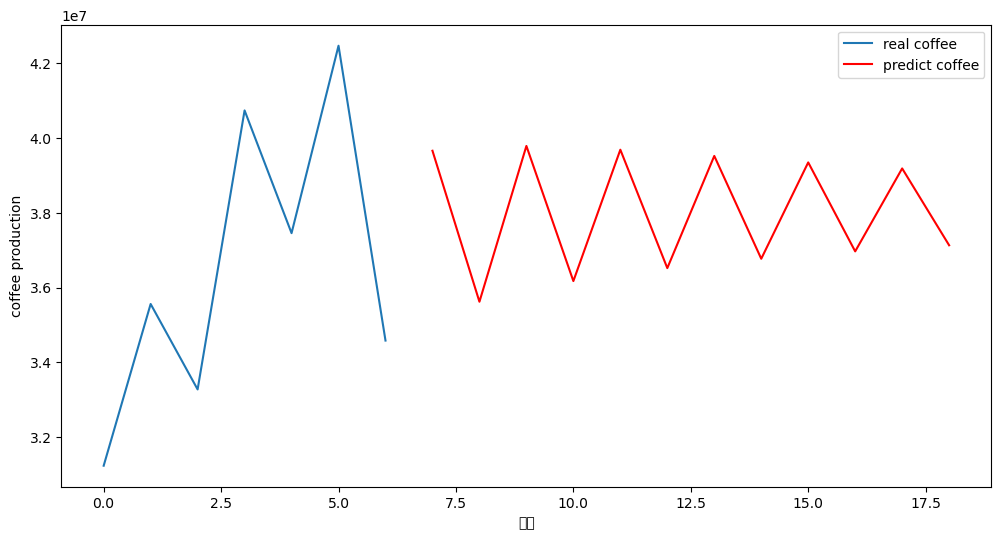

In [92]:
from statsmodels.tsa.api import VAR

# 커피재배지수와 커피생산량 데이터를 추출
coffee_series = af['커피재배지수']
production_series = af['상파울루 커피생산량']
dff = pd.DataFrame({'커피재배지수': coffee_series, '커피생산량': production_series})
model = VAR(dff)
model_fitted = model.fit()
# 모델 요약 정보 출력
print(model_fitted.summary())

# 미래 값 예측
n_forecast = 12  # 예측할 개월 수
forecast = model_fitted.forecast(dff.values[-model_fitted.k_ar:], steps=n_forecast)

# 예측 결과 출력
print("커피생산량 예측값:", forecast[:, 1])

# 결과 시각화 (예시로 시각화한 코드)
plt.figure(figsize=(12, 6))
plt.plot(dff['커피생산량'], label='real coffee')
plt.plot(range(len(dff), len(dff) + n_forecast), forecast[:, 1], label='predict coffee', color='red')
plt.xlabel('시간')
plt.ylabel('coffee production')
plt.legend()
plt.show()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 08, Oct, 2023
Time:                     16:15:14
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    28.2648
Nobs:                     6.00000    HQIC:                   27.6395
Log likelihood:          -96.4465    FPE:                2.82714e+12
AIC:                      28.4731    Det(Omega_mle):     1.25651e+12
--------------------------------------------------------------------
Results for equation 커피재배지수
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            72.360574        28.642503            2.526           0.012
L1.커피재배지수         0.342164         0.601519            0.569           0.569
L1.커피생산량         -0.000008         0.000004           -1.856           0.06

C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52964 (\N{HANGUL SYLLABLE KEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 493

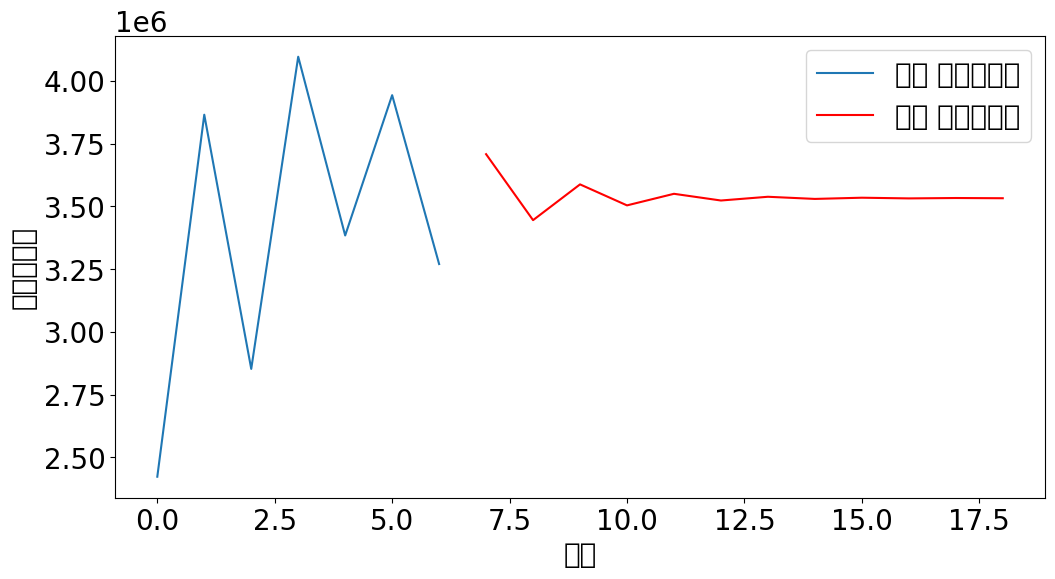

In [109]:
from statsmodels.tsa.api import VAR

# 커피재배지수와 커피생산량 데이터를 추출
coffee_series = cf['커피재배지수']
production_series = cf['상파울루 커피생산량']
dff = pd.DataFrame({'커피재배지수': coffee_series, '커피생산량': production_series})
model = VAR(dff)
model_fitted = model.fit()
# 모델 요약 정보 출력
print(model_fitted.summary())

# 미래 값 예측
n_forecast = 12  # 예측할 개월 수
forecast = model_fitted.forecast(dff.values[-model_fitted.k_ar:], steps=n_forecast)

# 예측 결과 출력
print("커피생산량 예측값:", forecast[:, 1])

# 결과 시각화 (예시로 시각화한 코드)
plt.figure(figsize=(12, 6))
plt.plot(dff['커피생산량'], label='실제 커피생산량')
plt.plot(range(len(dff), len(dff) + n_forecast), forecast[:, 1], label='예측 커피생산량', color='red')
plt.xlabel('시간')
plt.ylabel('커피생산량')
plt.legend()
plt.show()

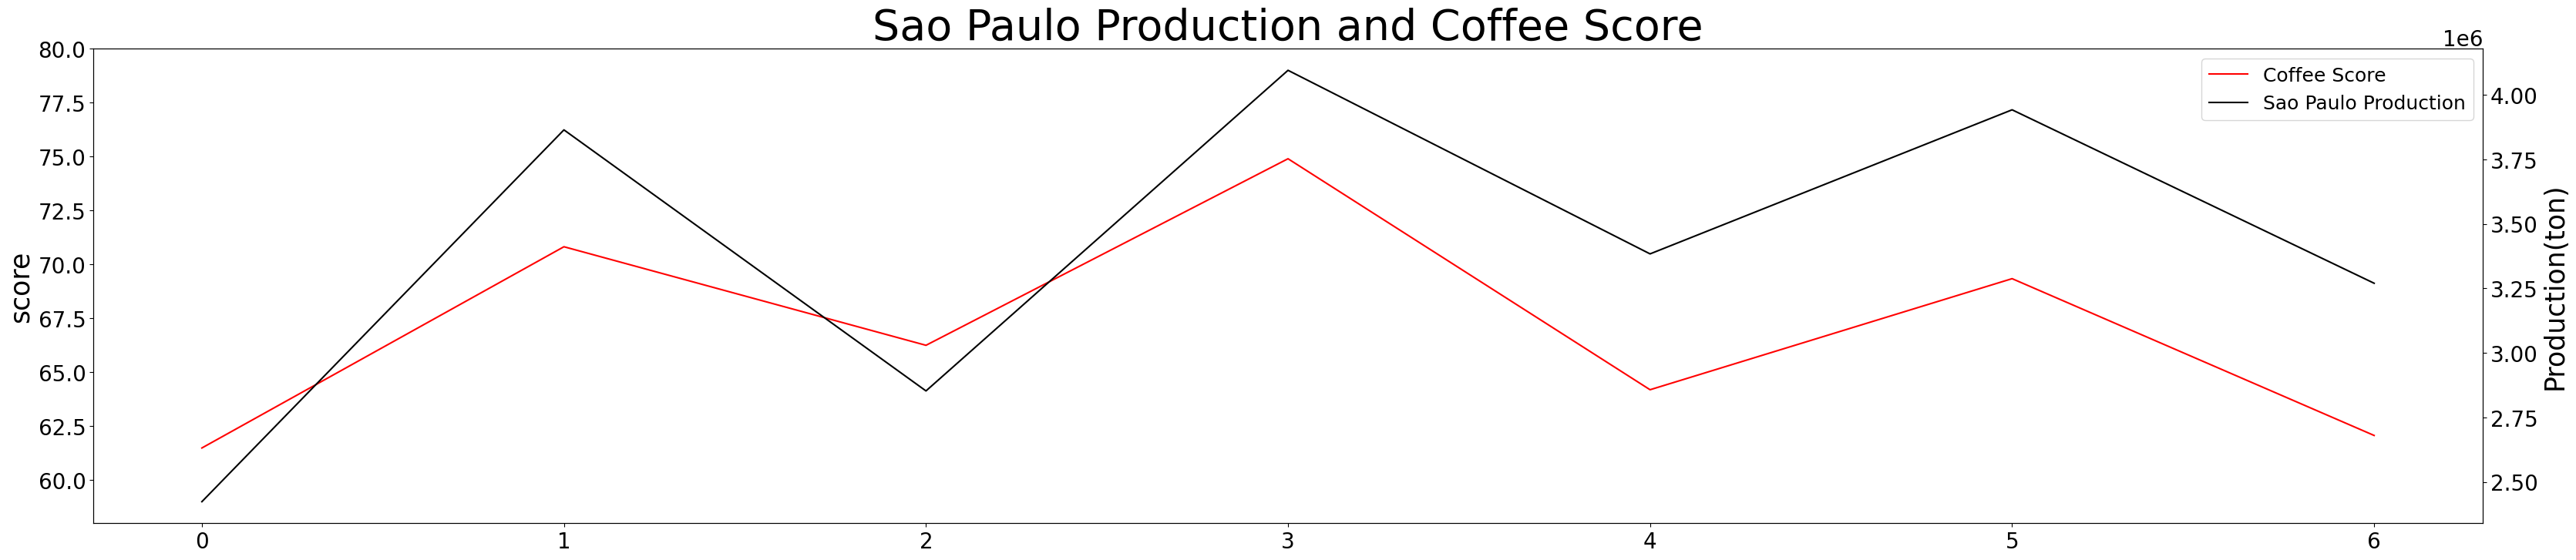

In [123]:
fig, ax1 = plt.subplots(figsize=(40, 8))
ax2 = ax1.twinx()

A = cf[['커피재배지수']]
B = cf[['브라질 커피 생산량']]
C = cf[['상파울루 커피생산량']]

line1 = ax1.plot(A.index, A['커피재배지수'], label='Coffee Score', color='r')
#line2 = ax2.plot(B.index, B['브라질 커피 생산량'], label='Brazil Production', color='k')
line3 = ax2.plot(C.index, C['상파울루 커피생산량'], label='Sao Paulo Production', color='k')

ax1.set_ylim([58, 80])
# ax2.set_ylim([0, 60])

lines = line1 + line3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 18, loc='upper right')
ax1.set_ylabel('score', fontdict={'fontsize':25})
ax2.set_ylabel('Production(ton)', fontdict={'fontsize':25})

plt.title('Sao Paulo Production and Coffee Score', fontdict = {'fontsize' : 40})
plt.rcParams['font.size'] = 20
# plt.axhline(3.1, color='0.5', linestyle='--', linewidth=2)
plt.show()

In [116]:
mse = mean_squared_error(cf['커피재배지수'],cf['상파울루 커피생산량'])

In [120]:
correlation_coefficient = cf['상파울루 커피생산량'].corr(cf['커피재배지수'])


In [121]:
correlation_coefficient

0.827014923401457